In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
reviews_df = pd.read_csv('data/Amazon Reviews.csv')
reviews_df.head(1).transpose()

,0
id,AVqkIhwDv8e3D1O-lebb
name,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,..."
asins,B01AHB9CN2
brand,Amazon
categories,"Electronics,iPad & Tablets,All Tablets,Fire Ta..."
keys,"841667104676,amazon/53004484,amazon/b01ahb9cn2..."
manufacturer,Amazon
reviews.date,2017-01-13T00:00:00.000Z
reviews.dateAdded,2017-07-03T23:33:15Z
reviews.dateSeen,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z"


In [3]:
reviews_df = reviews_df.drop(columns=['reviews.userCity', 'reviews.userProvince', 
                                      'reviews.id', 'reviews.didPurchase'],
                            axis=1)

In [4]:
reviews_df['reviews.text'].fillna(' ', inplace=True)

In [5]:
reviews_df["reviews.rating"] = reviews_df["reviews.rating"].apply(lambda x: 0 if x < 4 else 1)

<AxesSubplot:xlabel='reviews.rating', ylabel='count'>

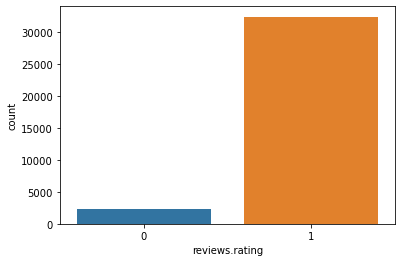

In [6]:
sns.countplot(reviews_df['reviews.rating'])

In [7]:
# print("Score negative (%):" + str(round(len(reviews_df[reviews_df['reviews.rating']==-1])/len(reviews_df['reviews.rating']),3)))
print("Score negative (%):" + str(round(len(reviews_df[reviews_df['reviews.rating']==0])/len(reviews_df['reviews.rating']),3)))
print("Score positive (%):" + str(round(len(reviews_df[reviews_df['reviews.rating']==1])/len(reviews_df['reviews.rating']),3)))

Score negative (%):0.067
Score positive (%):0.933


In [8]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import string

from nltk.corpus import stopwords 
stemmer = nltk.stem.PorterStemmer()
ENGLISH_STOP_WORDS = stopwords.words('english')
ENGLISH_STOP_WORDS.remove('not')
ENGLISH_STOP_WORDS.remove('no')

def my_tokenizer(sentence):
    
    for punctuation_mark in string.punctuation:
        # Remove punctuation and set to lower case
        sentence = sentence.replace(punctuation_mark,'').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
        
    # Remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

In [9]:
X = reviews_df['reviews.text']
y = reviews_df['reviews.rating']

In [10]:
from sklearn.model_selection import train_test_split

# Taking a chuck for our 20% test set
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, stratify=y, test_size=0.25)

# Splitting the remainder in two chunks
X_train, X_validation, y_train, y_validation = train_test_split(X_remainder, 
                                                                y_remainder, 
                                                                stratify=y_remainder, test_size=0.25)

from sklearn.feature_extraction.text import CountVectorizer 
bagofwords = CountVectorizer(stop_words="english", min_df = 10, # ngram_range = (1,3),
                             tokenizer=my_tokenizer)
bagofwords.fit(X_train)
X_train = bagofwords.transform(X_train)
X_validation = bagofwords.transform(X_validation)
X_test = bagofwords.transform(X_test)
X_remainder = bagofwords.transform(X_remainder)

In [11]:
X_train = X_train.toarray()

In [12]:
X_validation = X_validation.toarray()

In [13]:
y_train.values

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [113]:
y_test.values

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [114]:
X_test

29773    Very fast. Does everything you need it to at a...
8495     I bought three for my each of my grandchildren...
26654    I purchased this Echo as a gift for my husband...
306      This tablet is great for my son. Would be nice...
24987    Alexa is the most useful product I have purcha...
                               ...                        
11303    I have a couple kindle fires myself. I loved t...
11484    great ultracheap tablet from brand you can tru...
7622     Processor is relatively slow, but it is functi...
29118    We love our Amazon Echo but it is hard wired t...
12868    I like it for my kids and think it is a great ...
Name: reviews.text, Length: 8665, dtype: object

In [14]:
from sklearn.preprocessing import scale
import numpy as np
from keras.models import Sequential
from keras.layers import Dense



model = Sequential()
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train.values, epochs=100, batch_size=32, verbose=2, validation_data=(X_test, y_test.values))

score = model.evaluate(X_validation, y_validation.values, batch_size=128, verbose=2)
print (score[1])

Epoch 1/100
610/610 - 3s - loss: 0.2053 - accuracy: 0.9368 - val_loss: 0.1889 - val_accuracy: 0.9391
Epoch 2/100
610/610 - 2s - loss: 0.1281 - accuracy: 0.9553 - val_loss: 0.1946 - val_accuracy: 0.9363
Epoch 3/100
610/610 - 2s - loss: 0.0614 - accuracy: 0.9793 - val_loss: 0.3050 - val_accuracy: 0.9334
Epoch 4/100
610/610 - 2s - loss: 0.0212 - accuracy: 0.9934 - val_loss: 0.4003 - val_accuracy: 0.9288
Epoch 5/100
610/610 - 2s - loss: 0.0093 - accuracy: 0.9973 - val_loss: 0.5607 - val_accuracy: 0.9280
Epoch 6/100
610/610 - 2s - loss: 0.0076 - accuracy: 0.9978 - val_loss: 0.5505 - val_accuracy: 0.9302
Epoch 7/100
610/610 - 2s - loss: 0.0035 - accuracy: 0.9987 - val_loss: 0.6376 - val_accuracy: 0.9308
Epoch 8/100
610/610 - 2s - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.8254 - val_accuracy: 0.9251
Epoch 9/100
610/610 - 2s - loss: 0.0022 - accuracy: 0.9993 - val_loss: 0.8201 - val_accuracy: 0.9321
Epoch 10/100
610/610 - 2s - loss: 0.0033 - accuracy: 0.9987 - val_loss: 0.7764 - val_accura

Epoch 80/100
610/610 - 2s - loss: 4.4916e-04 - accuracy: 0.9998 - val_loss: 1.4371 - val_accuracy: 0.9291
Epoch 81/100
610/610 - 2s - loss: 4.3749e-04 - accuracy: 0.9998 - val_loss: 1.4385 - val_accuracy: 0.9291
Epoch 82/100
610/610 - 2s - loss: 4.3678e-04 - accuracy: 0.9998 - val_loss: 1.4985 - val_accuracy: 0.9297
Epoch 83/100
610/610 - 2s - loss: 4.3344e-04 - accuracy: 0.9998 - val_loss: 1.5472 - val_accuracy: 0.9302
Epoch 84/100
610/610 - 2s - loss: 4.6968e-04 - accuracy: 0.9998 - val_loss: 1.3671 - val_accuracy: 0.9289
Epoch 85/100
610/610 - 2s - loss: 4.6601e-04 - accuracy: 0.9998 - val_loss: 1.4901 - val_accuracy: 0.9303
Epoch 86/100
610/610 - 2s - loss: 4.4021e-04 - accuracy: 0.9998 - val_loss: 1.5242 - val_accuracy: 0.9306
Epoch 87/100
610/610 - 2s - loss: 4.3884e-04 - accuracy: 0.9998 - val_loss: 1.5715 - val_accuracy: 0.9306
Epoch 88/100
610/610 - 2s - loss: 4.5388e-04 - accuracy: 0.9998 - val_loss: 1.5961 - val_accuracy: 0.9309
Epoch 89/100
610/610 - 2s - loss: 4.5385e-04 -

<br>
<br>

### Word embeddings with Word2Vec

In [360]:
X = reviews_df['reviews.text']
y = reviews_df['reviews.rating']

In [361]:
from sklearn.model_selection import train_test_split

# Taking a chuck for our 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)

In [362]:
X_train.groupby(X_train.map(type).eq(str)).count()

reviews.text
True    25995
Name: reviews.text, dtype: int64

In [363]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train) # equivalent to .fit(X_train)
sequences = tokenizer.texts_to_sequences(X_train) # equivalent to .transform(X_train) 


In [364]:
import tensorflow as tf
train_data = tf.data.Dataset.from_tensor_slices((X_train,y_train))
test_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))
# validation_data = tf.data.Dataset.from_tensor_slices((X_validation, y_validation))
# remainder_data = tf.data.Dataset.from_tensor_slices((X_remainder, y_remainder))

In [365]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train = pad_sequences(sequences, padding='post', truncating='post')
X_test = pad_sequences(tokenizer.texts_to_sequences(X_test), padding='post', truncating='post')


In [366]:
# test_batches = test_data.shuffle(1000).padded_batch(8665)

In [367]:
X_test.shape

(8665, 708)

In [368]:
y_test.shape

(8665,)

In [369]:
X_train

array([[  54,   69,   44, ...,    0,    0,    0],
       [   4, 1013,   22, ...,    0,    0,    0],
       [  10, 4183, 5477, ...,    0,    0,    0],
       ...,
       [ 630,   11, 1704, ...,    0,    0,    0],
       [  11,   46,    5, ...,    0,    0,    0],
       [ 127,  167,   11, ...,    0,    0,    0]])

In [370]:
X_test

array([[   4,   41,  120, ...,    0,    0,    0],
       [   4,  390, 5422, ...,    0,    0,    0],
       [   6,    7,   74, ...,    0,    0,    0],
       ...,
       [  27,  354,    8, ...,    0,    0,    0],
       [  11,  559,    2, ...,    0,    0,    0],
       [   4,  146,    1, ...,    0,    0,    0]])

In [371]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [372]:
from gensim.models import Word2Vec
import time
# Skip-gram model (sg = 1)
size = 1000
window = 3
min_count = 1
workers = 3
sg = 1

# word2vec_model_file = 'word2vec_' + str(size) + '.model'
start_time = time.time()
stemmed_tokens = pd.Series(reviews_df['stemmed_tokens']).values
# Train the Word2Vec Model
w2v_model = Word2Vec(stemmed_tokens, min_count = min_count, size = size, workers = workers, window = window, sg = sg)
print("Time taken to train word2vec model: " + str(time.time() - start_time))
# model.save(word2vec_model_file)

Time taken to train word2vec model: 21.049301624298096


In [373]:
words = list(w2v_model.wv.vocab)
print('Vocabulary size: %d' % len(words))

Vocabulary size: 14225


In [374]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [375]:
embedding_dim=16

model = keras.Sequential([
  layers.Embedding(len(words), embedding_dim),
  layers.GlobalAveragePooling1D(),
  layers.Dense(16, activation='relu'),
  layers.Dense(1)
])

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 16)          227600    
_________________________________________________________________
global_average_pooling1d_9 ( (None, 16)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 17        
Total params: 227,889
Trainable params: 227,889
Non-trainable params: 0
_________________________________________________________________


In [378]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
813/813 [==============================] - 10s 12ms/step - loss: 0.2375 - accuracy: 0.9332 - val_loss: 0.2319 - val_accuracy: 0.9290
Epoch 2/100
813/813 [==============================] - 10s 12ms/step - loss: 0.2356 - accuracy: 0.9331 - val_loss: 0.2288 - val_accuracy: 0.9287
Epoch 3/100
813/813 [==============================] - 9s 11ms/step - loss: 0.2328 - accuracy: 0.9329 - val_loss: 0.2238 - val_accuracy: 0.9273
Epoch 4/100
813/813 [==============================] - 9s 11ms/step - loss: 0.2292 - accuracy: 0.9328 - val_loss: 0.2236 - val_accuracy: 0.9226
Epoch 5/100
813/813 [==============================] - 9s 11ms/step - loss: 0.2244 - accuracy: 0.9323 - val_loss: 0.2155 - val_accuracy: 0.9178
Epoch 6/100
813/813 [==============================] - 10s 12ms/step - loss: 0.2178 - accuracy: 0.9320 - val_loss: 0.2074 - val_accuracy: 0.9118
Epoch 7/100
813/813 [==============================] - 9s 10ms/step - loss: 0.2101 - accuracy: 0.9322 - val_loss: 0.2082 - val_accura

813/813 [==============================] - 9s 12ms/step - loss: 0.1050 - accuracy: 0.9636 - val_loss: 0.2808 - val_accuracy: 0.9094
Epoch 58/100
813/813 [==============================] - 9s 11ms/step - loss: 0.1039 - accuracy: 0.9638 - val_loss: 0.2841 - val_accuracy: 0.9161
Epoch 59/100
813/813 [==============================] - 8s 9ms/step - loss: 0.1031 - accuracy: 0.9638 - val_loss: 0.2870 - val_accuracy: 0.9147
Epoch 60/100
813/813 [==============================] - 10s 12ms/step - loss: 0.1020 - accuracy: 0.9648 - val_loss: 0.2907 - val_accuracy: 0.9083
Epoch 61/100
813/813 [==============================] - 10s 12ms/step - loss: 0.1018 - accuracy: 0.9651 - val_loss: 0.2963 - val_accuracy: 0.9243
Epoch 62/100
813/813 [==============================] - 9s 11ms/step - loss: 0.1008 - accuracy: 0.9656 - val_loss: 0.2953 - val_accuracy: 0.9094
Epoch 63/100
813/813 [==============================] - 10s 12ms/step - loss: 0.1007 - accuracy: 0.9645 - val_loss: 0.2989 - val_accuracy: 0.9

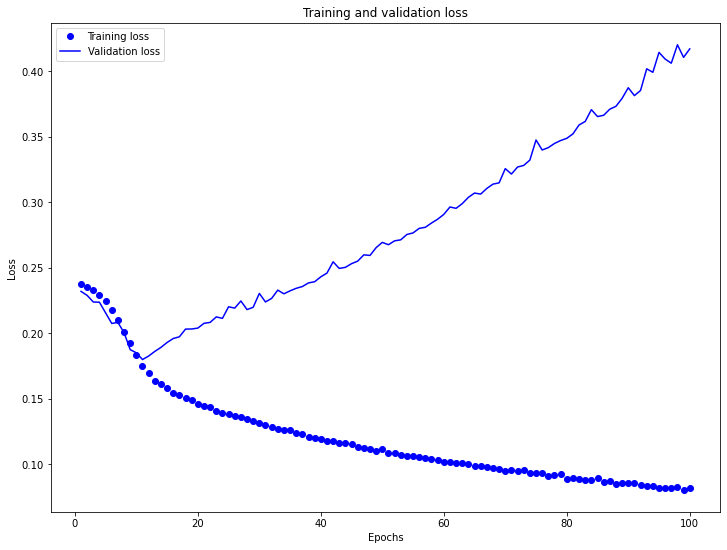

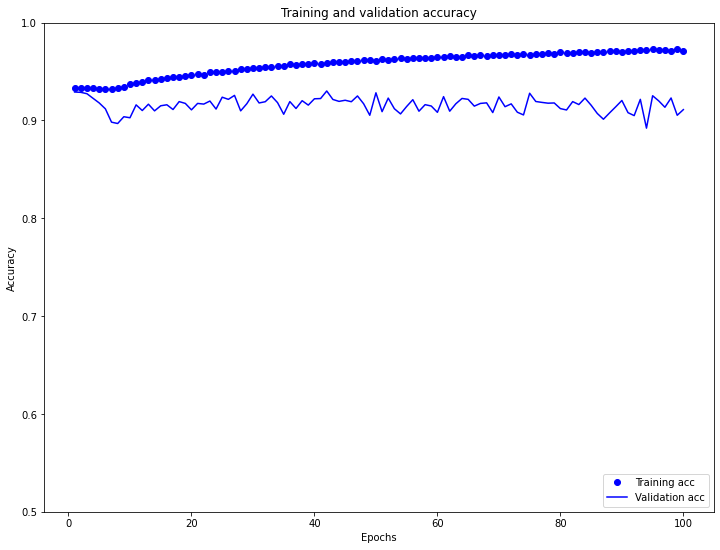

In [379]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()